In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Canada.xlsx', sheet_name ='Canada by Citizenship',skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df.rename(columns={ 'OdName':'Country','AreaName' :'Continent'},inplace=True)
df.drop(columns=['Type','Coverage','AREA','REG','DEV'],inplace=True)

#line chart

In [4]:
years=list(range(1980,2014))

<AxesSubplot:>

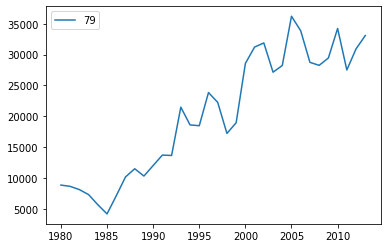

In [5]:
india_data = df[df['Country'] == 'India'][years].T
india_data.plot()

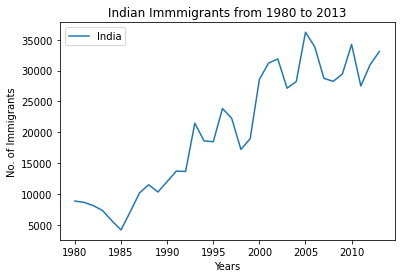

In [6]:
india_data=df[df['Country']=='India'][years].T
india_data.plot()
plt.title('Indian Immmigrants from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('No. of Immigrants')
plt.legend(['India'])
plt.show()

In [7]:
df.set_index('Country', inplace=True)

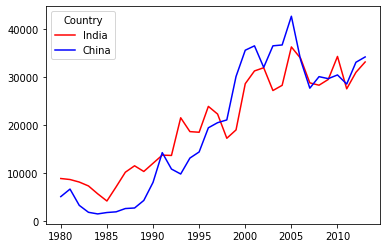

In [8]:
ind_ch=df.loc[['India','China'],years].T
ind_ch.plot( kind='line',color=['red','blue'])
plt.show()

In [9]:
df['Total']= df.sum(axis=1)


C:\Users\dell\AppData\Local\Temp/ipykernel_3652/3268949468.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total']= df.sum(axis=1)


In [10]:
df

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [11]:
continents = df.groupby('Continent').sum() ['Total']
continents

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

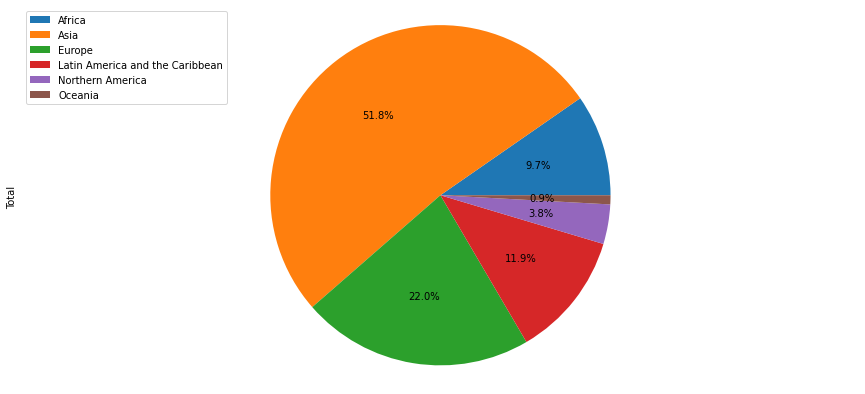

In [12]:
continents.plot(kind='pie', figsize=(15,7), autopct='%1.1f%%', labels=None)
plt.legend(continents.index, loc='upper left')
plt.axis('equal')
plt.show()

In [13]:
import plotly.express as px

In [14]:
import seaborn as sns

In [15]:
penguins= sns.load_dataset('penguins')

In [16]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
px.bar(data_frame=penguins.groupby('species', as_index=False).count(), x='species', y='island')

In [18]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [19]:
px.scatter(data_frame=penguins, x='flipper_length_mm' , y='body_mass_g', color='island')